<center><b>Wave Incident on Layered Material</b></center>
<center>Solution to Q15 of Oscillations, Waves & Optics</center>

A plane wave of unit amplitude, $e^{i\omega t - ik_1 x}$ propagates in the $+x$ direction of a region of impedance $Z_1$ which fills the region $x < 0$. It is incident normally on a layer of material of thickness $l$ and impedance $Z_2$ which fills the region $0 < x < l$. Some of it is, in general, reflected so that the total disturbance in $x < 0$ is:

<center>$\psi_1 = e^{i\omega t - ik_1 x}+re^{i\omega t + ik_1 x}$</center>

where $r$ is the complex amplitude of the reflected wave. In steady state, region 2 in general contains forward and backward travelling waves of complex amplitude $a$ and $b$:

<center>$\psi_2 = ae^{i\omega t - ik_2 x}+be^{i\omega t + ik_2 x}$</center>

The layer lies on an infinite substrate of impedance $Z_3$, which fills the region $x > l$. In this region, the transmitted wave can be written:

<center>$\psi_3 = t e^{i\omega t - ik_3 x}$</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact

By solving the boundary conditions at $x = 0$ and $x = l$ (exercise), one finds the matrix equation:

<center>$\begin{pmatrix}
-1 & 1 & 1 & 0 \\
1 & Z_1/Z_2 & -Z_1/Z_2 & 0 \\
0 & e^{-ik_2 l} & e^{ik_2 l} & -1 \\
0 & e^{-ik_2 l} & -e^{ik_2 l} & -Z_2/Z_3 \\
\end{pmatrix}$
$\begin{pmatrix}
r\\
a \\
b \\
t \\
\end{pmatrix}$
$= \begin{pmatrix}
1 \\
1 \\
0 \\
0 \\
\end{pmatrix}$</center>

An inverse for this matrix can be found numerically and hence $(r,a,b,t)$ found by premultiplication by the matrix inverse

In [2]:
def matrix_solve(Z_1,Z_2,Z_3,k_2,l):
    vec_list = []
    for i in range(len(l)):
        exp = np.e**(1j*k_2*l[i])
        Y = np.array((1.,1.,0.,0.))
        X = np.array(((-1.,1.,1.,0.),(1.,Z_1/Z_2,-Z_1/Z_2,0),(0.,exp**-1,exp,-1.),(0.,exp**-1,-exp,-Z_2/Z_3)))
        X_inv = np.linalg.inv(X)
        vec_list.append(X_inv.dot(Y))
    return vec_list

All there remains to do is set up a way to plot the reflection/transmission amplitude and phase as a function of layer thickness.

Reflection terms will be plotted in red and transmission in blue. Impedances and $k_2$ can be changed by sliders

For what impedances and thicknesses is there no reflection? c.f. anti-reflection coatings

<IPython.core.display.Javascript object>


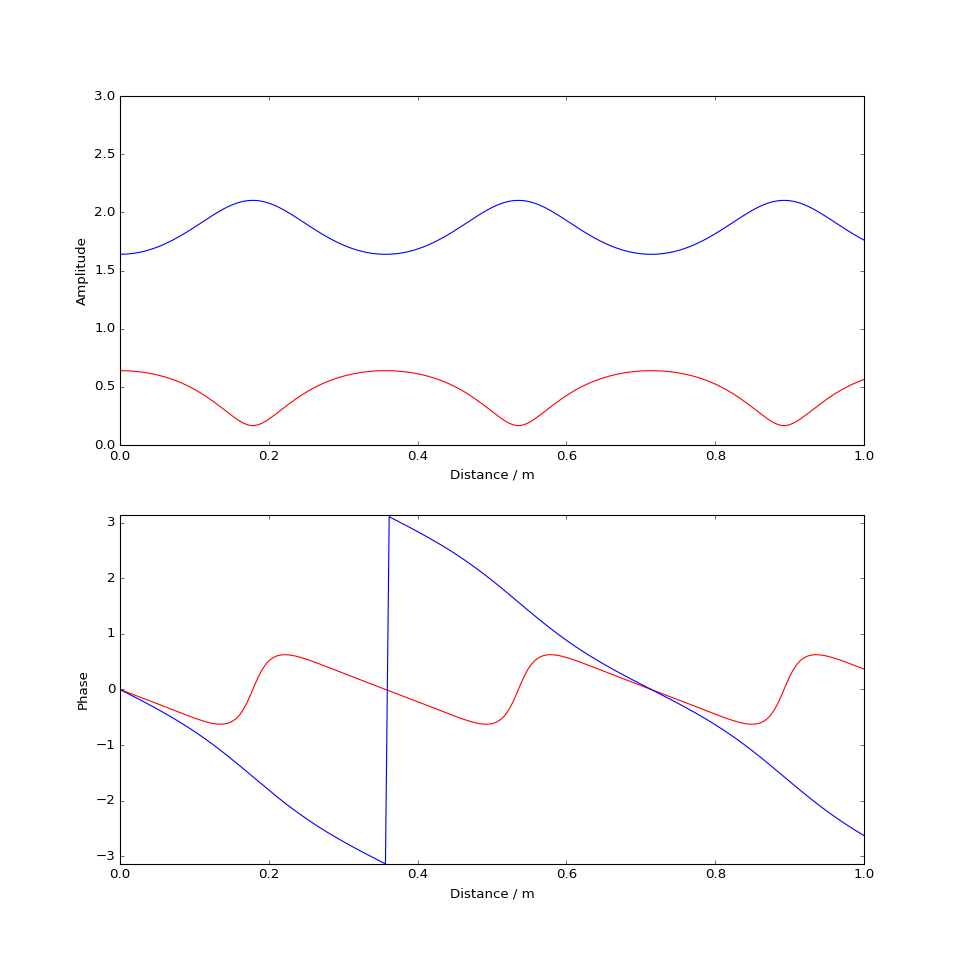

In [4]:
l = np.linspace(0.,1.,200)

# Initialising plot
fig = plt.figure(figsize = (12,12))
ax1 = plt.subplot(211)
ax1.set_xlim((0.,1.))
ax1.set_xlabel('Distance / m')
ax1.set_ylim((0.,3.))
ax1.set_ylabel('Amplitude')
ax2 = plt.subplot(212)
ax2.set_xlim((0.,1.))
ax2.set_xlabel('Distance / m')
ax2.set_ylim((-np.pi,np.pi))
ax2.set_ylabel('Phase')
lines = (ax1.plot([],[],'r')[0],ax1.plot([],[],'b')[0],ax2.plot([],[],'r')[0],ax2.plot([],[],'b')[0])

def main(Z_1,Z_2,Z_3,k_2):

    vec_list = matrix_solve(Z_1,Z_2,Z_3,k_2,l)

    def data_unpack(vec_list):
        r_amp = [np.absolute(x[0]) for x in vec_list]
        t_amp = [np.absolute(x[3]) for x in vec_list]
        r_phase = [np.angle(x[0]) for x in vec_list]
        t_phase = [np.angle(x[3]) for x in vec_list]
        return r_amp,t_amp,r_phase,t_phase
    
    r_amp,t_amp,r_phase,t_phase = data_unpack(vec_list)

    lines[0].set_data(l,r_amp)
    lines[1].set_data(l,t_amp)
    lines[2].set_data(l,r_phase)
    lines[3].set_data(l,t_phase)
    display(fig)

interact(main,Z_1 = (0.1,10.),Z_2 = (0.1,10.),Z_3 = (0.1,10.),k_2 = (0.,10.));